In [1]:
import numpy as ny
%matplotlib inline
import pandas as ps
import matplotlib.pyplot as ml
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline


In [62]:
ny.random.seed(0)
X=2-ny.random.normal(0,3,9)
Y=2-X+0.2*X**2

In [63]:
x=X[:,ny.newaxis]
y=Y.reshape(-1,1)
print(x,"\n",'y',"\n",y)

[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]] 
 y 
 [[ 7.45981663]
 [ 1.32832075]
 [ 3.11151327]
 [11.18342011]
 [ 8.19852592]
 [ 1.93276297]
 [ 2.99485545]
 [ 0.75042188]
 [ 0.75724613]]


In [64]:
MM=LinearRegression()
MM.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
MM.score(x,y)

0.7727817756919656

In [66]:
MM.coef_

array([[-1.03484694]])

In [67]:
MM.intercept_

array([3.8562908])

In [89]:
mean_squared_error(x,MM.predict(x))

58.60741245676464

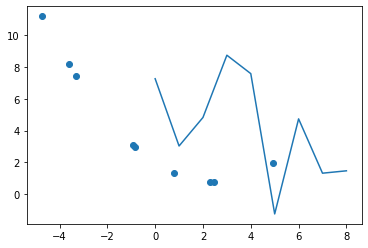

In [69]:
ml.scatter(x,y)
ml.plot(MM.predict(x))

In [100]:
from sklearn.datasets import load_boston
DF = load_boston()


In [103]:
DF=ps.DataFrame(load_boston().data)

In [104]:
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [124]:
DF.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m"]

In [125]:
DF.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [126]:
DF.corr()

,a,b,c,d,e,f,g,h,i,j,k,l,m
a,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
b,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
c,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
d,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
e,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
f,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
g,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
h,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
i,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
j,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


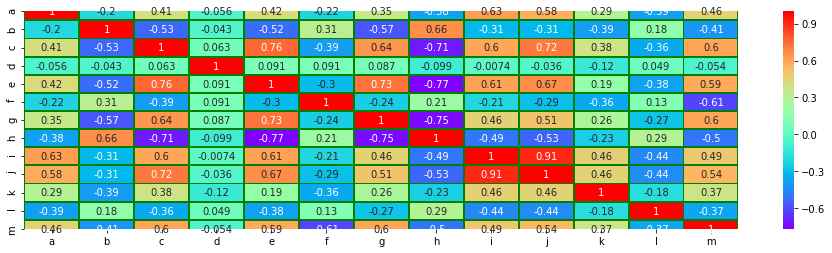

In [127]:
ml.figure(figsize=(16,4))
sb.heatmap(DF.corr(),cmap="rainbow",annot=True,linecolor="g",linewidths=0.9)
ml.show()

In [129]:
DF.drop(columns=['j'])

,a,b,c,d,e,f,g,h,i,k,l,m
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [302]:
a=ny.array(DF["a"])[:,ny.newaxis]
a.shape

(506, 1)

In [148]:
MM=LinearRegression()
MM.fit(a,DF["e"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
MM.predict(a)

array([0.53423783, 0.53435687, 0.53435675, 0.53438556, 0.53459358,
       0.53437127, 0.5347027 , 0.53502176, 0.53539997, 0.53516632,
       0.53547739, 0.53486818, 0.53473383, 0.53777349, 0.53781999,
       0.53776005, 0.54017905, 0.53864935, 0.53875433, 0.53831815,
       0.54130116, 0.53903409, 0.54119159, 0.53980759, 0.53845687,
       0.53896887, 0.53801253, 0.53962236, 0.53858578, 0.5398871 ,
       0.54061505, 0.5418849 , 0.54207358, 0.54073364, 0.54334864,
       0.53456591, 0.53475459, 0.53465648, 0.53519473, 0.53435868,
       0.53439248, 0.53492473, 0.53500446, 0.53510575, 0.53489779,
       0.53517415, 0.53527022, 0.53550223, 0.53564174, 0.53544835,
       0.53470519, 0.53444795, 0.53450596, 0.53448447, 0.53427911,
       0.53427633, 0.53431853, 0.5342832 , 0.5350779 , 0.53478771,
       0.53504881, 0.53517579, 0.53482735, 0.53491939, 0.53431263,
       0.53440524, 0.53445033, 0.53453029, 0.53497066, 0.53492881,
       0.53470253, 0.53510235, 0.5347217 , 0.53531008, 0.53464

In [152]:
MM.score(a,DF["e"])

0.17721718179269352

In [157]:
mean_absolute_error(DF["e"],MM.predict(a))

0.08121228573938195

In [158]:
MM.coef_

array([0.00567122])

In [159]:
MM.intercept_

0.5342019853246204

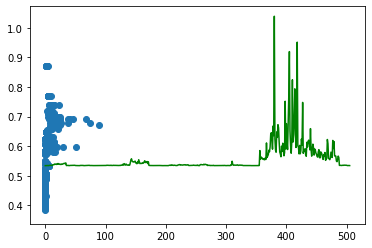

In [167]:
ml.scatter(a,DF["e"])
ml.plot(MM.predict(a),"g")

In [328]:
v=DF["tar"]=load_boston().target

In [272]:
u=DF[DF.columns.drop("tar")]

In [273]:
for i in DF.columns:
    print(i,DF[i].nunique())

a 504
b 26
c 76
d 2
e 81
f 446
g 356
h 412
i 9
j 66
k 46
l 357
m 455
tar 229


In [274]:
MM.fit(u,v)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [275]:
MM.score(u,v)

0.7406426641094095

In [284]:
MM.predict(u)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [289]:
(ny.array(DF.iloc[0,:len(DF.columns)-1]).reshape(-1,1)).shape

(13, 1)

In [295]:
mean_absolute_error(v,MM.predict(u))

3.270862810900317

In [309]:
MM.predict(tt)

array([25.02556238])

In [308]:
tt=ny.array(DF.iloc[1,:len(DF.columns)-1])[:,ny.newaxis].T
tt

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [305]:
u.shape

(506, 13)

In [321]:
PF=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())

In [322]:
PF.fit(u,v)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [323]:
PF.predict(u)

array([23.99996869, 21.60187026, 34.70491943, 33.42036765, 36.19786459,
       28.68147716, 22.9730479 , 27.07847957, 16.49298896, 18.9544297 ,
       15.01491388, 18.8003684 , 21.68020695, 20.36549458, 18.22446541,
       19.95547895, 23.09363955, 17.72278086, 20.1996044 , 18.12708269,
       13.63042696, 19.56139824, 15.18863032, 14.5768225 , 15.4026857 ,
       13.85047662, 16.59901891, 14.8650393 , 18.52252582, 20.83464761,
       12.62048009, 14.52741794, 13.20442089, 13.15096691, 13.47986915,
       18.91415966, 20.00613137, 20.8769966 , 24.80309064, 30.82523028,
       34.87113663, 26.63950042, 25.29115578, 24.63232915, 21.22255485,
       19.35821444, 19.96995975, 16.59092403, 14.40674175, 19.3845068 ,
       19.68756467, 20.5593796 , 24.99957519, 23.35770582, 18.90583686,
       35.39907398, 24.70149454, 31.60106842, 23.27992535, 19.62190863,
       18.68020558, 16.00091705, 22.18000686, 25.04002006, 32.99538873,
       23.51510103, 19.38716612, 22.0678366 , 17.41491925, 20.82

In [329]:
PF.score(u,v)

0.9979686566178984

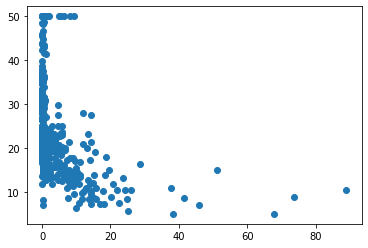

In [337]:
ml.scatter(u["a"],v)


In [336]:
u["a"]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: a, Length: 506, dtype: float64

# Regression 2

In [1]:
import numpy as ny 
import pandas as ps
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [177]:
df=ps.read_csv(r"C:\Users\ShinChan\Downloads\Maison.csv")

In [178]:
df.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [5]:
df.isna().sum()

PRIX          0
SUPERFICIE    0
CHAMBRES      0
SDB           0
ETAGES        0
ALLEE         0
SALLEJEU      0
CAVE          0
GAZ           0
AIR           0
GARAGES       0
SITUATION     0
dtype: int64

In [23]:
df.describe()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
PRIX          546 non-null int64
SUPERFICIE    546 non-null int64
CHAMBRES      546 non-null int64
SDB           546 non-null int64
ETAGES        546 non-null int64
ALLEE         546 non-null int64
SALLEJEU      546 non-null int64
CAVE          546 non-null int64
GAZ           546 non-null int64
AIR           546 non-null int64
GARAGES       546 non-null int64
SITUATION     546 non-null int64
dtypes: int64(12)
memory usage: 51.3 KB


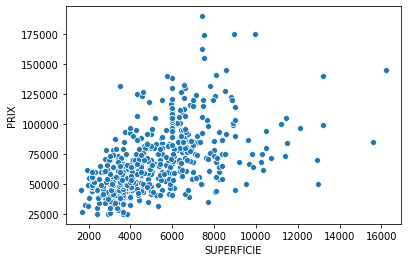

In [45]:
sb.scatterplot(df.SUPERFICIE,df.PRIX)

In [179]:
x=df.drop(columns=["PRIX"]).to_numpy()
y=df.PRIX.to_numpy()
x.shape
y.shape

(546,)

In [342]:
x1,a,y1,b=train_test_split(x,y,random_state=7,test_size=0.3)

In [343]:
LM=LinearRegression().fit(x1,y1)

In [344]:
a.shape

(164, 11)

In [345]:
LM.predict(a)

array([ 92331.44452846,  52210.94253424,  55488.87725997,  84598.55247681,
       115703.57964163,  65906.7240947 ,  74304.86655154,  81020.21704297,
        40383.06381376,  45743.03368579,  97152.45767138,  56633.55008041,
        40149.93836638,  94076.49788557,  61147.4605975 ,  94186.96156691,
        43915.95931632,  76541.92592615,  68619.10740383,  63920.55454429,
        79388.06822437,  78800.99277205,  69669.08287448,  63167.59814351,
        84788.86837844,  87372.01023701,  53711.99360815,  74490.0960174 ,
        68425.1406102 ,  35482.43386547, 115336.35064343,  89530.04484424,
        58084.38733319,  70978.36615703,  74784.72430737,  42459.31967124,
        79233.03316281,  50629.3015094 ,  56943.11628656, 120936.91037519,
        80339.72018388,  33203.66392715,  44583.15239573,  79311.10916032,
        97152.45767138,  42661.46710642,  47121.20855485,  62852.63860175,
        66591.97793193,  41497.58793421,  67199.17944846,  91439.43868997,
        96888.92736973,  

In [136]:
df["Predict"]=LM.predict(x)

In [184]:
LM.intercept_

-3279.0226024258736

In [185]:
LM.coef_

array([3.06283993e+00, 2.68739527e+03, 1.32470886e+04, 6.35243311e+03,
       8.71481773e+03, 6.08890280e+03, 4.28823541e+03, 1.36739073e+04,
       1.33735275e+04, 4.62925282e+03, 5.85310274e+03])

In [139]:
w=df.iloc[1,1:]

In [174]:
q=w.to_numpy()


In [175]:
q.reshape(1,12)

array([[4.00000000e+03, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.26614671e+04]])

In [110]:
b.shape

(137,)

In [97]:
x1[0]

array([4000,    3,    1,    1,    1,    0,    0,    0,    0,    0,    0],
      dtype=int64)

In [69]:
y1.shape

(409,)

In [70]:
a.shape

(137, 11)

In [176]:
LM.predict(q.reshape(1,12))

array([42679.76731178])

In [172]:
df.shape

(546, 13)

In [173]:
df


,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION,Predict
0,42000,5850,3,1,2,1,0,1,0,0,1,0,66285.037573
1,38500,4000,2,1,1,1,0,0,0,0,0,0,42661.467106
2,49500,3060,3,1,1,1,0,0,0,0,0,0,42469.792846
3,60500,6650,3,1,2,1,1,0,0,0,0,0,65906.724095
4,61000,6360,2,1,1,1,0,0,0,0,0,0,49889.769334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0,99565.952564
542,94000,6000,3,2,4,1,0,0,0,1,0,0,97152.457671
543,103000,6000,3,2,4,1,1,0,0,1,1,0,107870.613293
544,105000,6000,3,2,2,1,1,0,0,1,1,0,95165.747081


In [186]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [187]:
r2_score(b,LM.predict(a))

0.7042778940078107

In [194]:
from statsmodels import api

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [221]:
LM1=api.OLS(x1,inr)
inr=api.add_constant(x1)
LM1.fit()

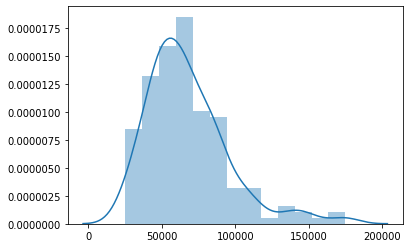

In [212]:
sb.distplot(b)

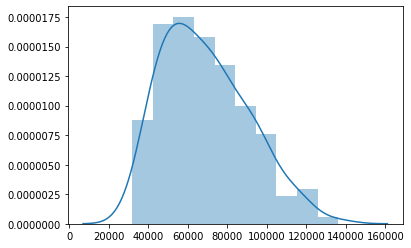

In [213]:
sb.distplot(LM.predict(a))

In [228]:
dff=df.corr()

In [268]:
for i in dff.columns:
    df1=dff[dff[i]<0.5]

In [252]:
df[(df["PRIX"]>df.describe().loc["25%","PRIX"]) & (df["PRIX"]<df.describe().loc["75%","PRIX"])]

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,66000,5010,3,1,2,1,0,1,0,0,0,0
514,58900,6060,2,1,1,1,0,1,0,0,1,0
515,53000,3584,2,1,1,1,0,0,1,0,0,0
532,70000,12900,3,1,1,1,0,0,0,0,2,0


In [265]:
for i in df.columns[1:2]:
    ds=df[(df[i]>df.describe().loc["25%",i]) & (df[i]<df.describe().loc["75%",i])]

In [266]:
ds


,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0
7,69000,4160,3,1,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [278]:
for i in df.columns:
    ss=ds[i].value_counts()
    print(i,ss)

PRIX 60000     10
70000      8
50000      7
67000      5
82000      5
          ..
40750      1
94000      1
72500      1
91500      1
117000     1
Name: PRIX, Length: 139, dtype: int64
SUPERFICIE 6000    24
4500    13
4000    11
5500     9
4040     7
        ..
5020     1
6040     1
3990     1
3840     1
5360     1
Name: SUPERFICIE, Length: 124, dtype: int64
CHAMBRES 3    137
2     69
4     49
5      3
6      1
1      1
Name: CHAMBRES, dtype: int64
SDB 1    194
2     62
3      4
Name: SDB, dtype: int64
ETAGES 2    117
1    101
4     24
3     18
Name: ETAGES, dtype: int64
ALLEE 1    233
0     27
Name: ALLEE, dtype: int64
SALLEJEU 0    211
1     49
Name: SALLEJEU, dtype: int64
CAVE 0    181
1     79
Name: CAVE, dtype: int64
GAZ 0    248
1     12
Name: GAZ, dtype: int64
AIR 0    173
1     87
Name: AIR, dtype: int64
GARAGES 0    153
1     61
2     44
3      2
Name: GARAGES, dtype: int64
SITUATION 0    223
1     37
Name: SITUATION, dtype: int64


In [280]:
ds=ds.drop(columns=["ALLEE","SALLEJEU","CAVE","GAZ","AIR","SITUATION"])

In [281]:
ds.tail()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,GARAGES
541,91500,4800,3,2,4,0
542,94000,6000,3,2,4,0
543,103000,6000,3,2,4,1
544,105000,6000,3,2,2,1
545,105000,6000,3,1,2,1


In [284]:
u=ds.drop(columns=["PRIX"]).to_numpy()
v=ds.PRIX.to_numpy()

In [376]:
l,o,i,p=train_test_split(u,v,random_state=7,test_size=0.25)

In [377]:
LP=LinearRegression()

In [297]:
LP.fit(l,i)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [304]:
LP.predict(o)

array([ 54567.96944555,  93976.70519756,  56212.19813397,  66099.03230234,
       100678.082128  ,  55136.11864153,  48114.16862792,  42310.096166  ,
        59046.36076885,  54422.8569159 ,  42271.33194178,  79258.65285811,
        45760.11212148,  64135.03531244,  79481.06808423,  59062.43671041,
        61623.05825338,  60645.57422152,  45449.99832773,  80458.55211609,
        78057.58748887,  69994.62885135,  63768.52418993,  95572.00023185,
        72628.4133537 ,  94239.6763407 ,  73724.34239132,  57883.43404229,
        56381.50955744,  72459.4632598 ,  67602.69315031,  66003.41559011,
        62263.1104678 ,  76475.95181106, 100176.56379823,  86999.14483816,
        68628.82166608,  55014.88145009,  70210.45734388,  78675.39780202,
        61400.41727529,  58464.21649435,  59790.34401436,  71981.4845462 ,
        71826.42764932,  61992.44180949,  64113.91297061,  76769.98966326,
        74193.29217874,  49016.30695586,  87157.06539079,  95250.40982614,
        67776.68964448,  

In [315]:
df.to_csv(r"C:\Users\ShinChan\Downloads\Maison.csv")

In [322]:
fd=ps.DataFrame(LP.predict(o),columns=["{0:pridict}"]).to_csv(r"C:\Users\ShinChan\Downloads\predict - Copy.csv")

In [331]:
fd=ps.DataFrame(LP.predict(o),columns={"{0:pridict}":"pridict"})

In [340]:
fd.columns

Index(['{0:pridict}', 'original', 'differ'], dtype='object')

In [333]:
fd["original"]=p

In [337]:
fd["differ"]=fd.apply(lambda i :i-fd.original)

In [339]:
fd.to_csv(r"C:\Users\ShinChan\Downloads\predict - Copy.csv")

In [341]:
r2_score(p,LP.predict(o))

0.2409316548722642

In [346]:
r2_score(b,LM.predict(a))

0.7042778940078107

In [355]:
LM.predict(a).shape

(164,)

In [357]:
b.shape

(164,)

In [359]:
b.reshape(-1,1).shape

(164, 1)

In [363]:
PR=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [364]:
PR.fit(x1,y1)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [365]:
PR.predict(a)

array([ 90499.5319486 ,  41523.51457261,  62243.24867098,  78187.22869461,
       115088.1353399 ,  48711.88170874,  72134.90005327,  65457.04847798,
        44186.42606052,  46431.68760061,  93346.18754008,  51176.48062006,
        39645.2929043 ,  91113.95734372,  71092.44184732, 109761.58988264,
        60451.69166805,  64641.58870159,  70274.70582352,  62690.17554105,
        87153.00811649,  80674.30947092,  63598.8430005 ,  72094.64961755,
        96892.73174322,  84529.60679903,  40342.38068064,  67193.0877277 ,
        50868.20950967,  36846.36105293, 126874.09940632,  92861.91302229,
        70582.21181743,  68512.24857938,  67795.6219603 ,  43928.29934164,
        78218.55961925,  49733.81839248,  61181.82010055,  52695.59423094,
        63494.73920945,  42496.15551443,  48162.09596908,  72812.22742365,
        93346.18754008,  44275.19122248,  45226.62700628,  35277.96453777,
        62672.87298616,  42216.17340781,  61902.30222252,  94862.21577448,
        86320.6444121 ,  

In [366]:
r2_score(b,PR.predict(a))

0.5784501439782528

In [367]:
PR1=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())

In [368]:
PR1.fit(x1,y1)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [369]:
PR1.predict(a)

array([  72295.73335177,   49979.46305002,   66888.63260553,
        -33105.26212571,   89971.647005  ,  107447.0141248 ,
        105406.69439194,  228919.23066484,   37644.38591985,
          3752.30087061,   81774.08215188,   42920.31748732,
         39566.18081596,   97122.61859416,   67443.7648307 ,
         45559.90864049,   63453.207029  ,   78914.02302068,
         88625.72004248,   40597.06877498,  115652.84996465,
         79693.54037481,   68656.98761235,  167001.93746216,
         51571.35304431,   67560.92080748,   47981.94964181,
         77292.17027269,   30747.76153857,   43154.69914168,
        470121.75871418,  109147.88948795,   80062.77369798,
         78556.75285898,   67286.73588799,   43829.54548624,
         54311.14841712,   47892.96471313,   63865.71458157,
       -516595.16913283,  220474.13489921,   39003.09680698,
         52052.40919095,   70282.52410377,   81774.08215188,
         44135.48024736,   93577.31790115,  -95276.55691152,
        102589.71223092,

In [373]:
r2_score(b,PR1.predict(a))

-6.949318115027269

In [378]:
PR.fit(l,i)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [379]:
PR.predict(o)

array([ 51753.3514365 , 102004.42719194,  48907.52938641,  58485.46764741,
       103222.14862572,  54915.45784563,  50512.44349727,  44246.69558179,
        59416.10228364,  54299.27861071,  44201.23189673,  75260.49351302,
        48058.20667401,  67803.30202757,  76428.0236033 ,  59992.24935579,
        58014.80704719,  59180.11204449,  47734.59050307,  72276.85044027,
        79064.3999169 ,  71266.23898825,  63404.44748259, 101512.86974091,
        85781.04759797,  98914.64713413,  80612.00871227,  58355.77266062,
        56877.49192983,  72937.59211714,  62480.54805671,  60925.43276136,
        57276.42746767,  77214.47491001,  96857.6699836 ,  91513.84847845,
        63268.81243734,  55514.7387496 ,  66911.1250981 ,  68494.55556895,
        59474.60858064,  56227.21656957,  58697.39575611,  64434.06558659,
        64328.61662316,  61866.16561674,  60974.34734282,  74064.9651432 ,
        68691.21804808,  51229.68443942,  80710.84975479,  99136.23661949,
        67730.6785698 ,  

In [380]:
r2_score(p,PR.predict(o))

0.20987092621396852

In [382]:
PR1.fit(l,i)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [383]:
PR1.predict(o)

array([ 53837.19429527,  96644.08387388,  60307.89174192,  64028.14397469,
       105580.72638779,  48922.93512529,  52542.46907364,  43673.49805876,
        55243.19146347,  47068.79757548,  43584.65926566,  78731.47383143,
        49818.66751298,  58224.47751007,  91061.4069653 ,  61638.22728558,
        48553.85418372,  69434.27366413,  49388.40009705,  70248.96933499,
        71729.58889905,  69301.39222259,  74828.75329689, 140086.15116492,
       -43478.53658992,  91876.50470658,  54385.67194826,  55130.44225151,
        60760.63557736,  79248.90664467,  59670.8903488 ,  49363.28921883,
        61851.72957893, -35093.34530155,  86432.72037505,  73009.62136273,
        68138.71180293,  54175.87054541,  62055.08594689,  62593.9054212 ,
        57658.94557754,  59366.60532119,  57363.05195992,  25816.34213525,
        25948.66813491,  55377.29198337,  58791.81684021,  71400.69354869,
        63497.14165078,  53393.3773199 , 102068.76470343,  94378.43623179,
        62417.22919906,  

In [384]:
r2_score(p,PR1.predict(o))

-0.4146484707334277

In [386]:
g=ds.SUPERFICIE.to_numpy()
h=ds.PRIX.to_numpy()

In [435]:
c,b,n,m=train_test_split(g,h,test_size=0.3,random_state=77)

In [436]:
n=n.reshape(-1,1)
c=c.reshape(-1,1)
PR.fit(c,n)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [437]:
b=b.reshape(-1,1)
m=m.reshape(-1,1)

In [431]:
PR.predict(b)


array([[ 77525.47068608],
       [ 53799.7419697 ],
       [ 79530.48232799],
       [ 56619.17942705],
       [ 57610.70309231],
       [ 54965.78592942],
       [ 74557.6078978 ],
       [ 77442.32194041],
       [ 72935.9243862 ],
       [ 57604.75838717],
       [ 74557.6078978 ],
       [ 70548.76812111],
       [ 70548.76812111],
       [ 78275.32860716],
       [ 86965.77768531],
       [ 68225.64610634],
       [ 85095.22102706],
       [ 66717.5644361 ],
       [ 54494.5336332 ],
       [ 54035.00518284],
       [ 94528.41125726],
       [ 58825.69206183],
       [ 91692.30025908],
       [ 70548.76812111],
       [ 56448.2388499 ],
       [ 54807.40910829],
       [ 62214.85764698],
       [ 62419.93517482],
       [104723.49641634],
       [ 60807.70591482],
       [ 86359.92249029],
       [ 84183.33912435],
       [ 79656.31967486],
       [ 54035.00518284],
       [ 63180.28285151],
       [ 69766.76055084],
       [ 53324.53716599],
       [ 79530.48232799],
       [ 618

In [432]:
r2_score(m,PR.predict(b))

0.2791419602712214

In [433]:
g=(df.SUPERFICIE**2).to_numpy()
h=df.PRIX.to_numpy()

In [434]:
c,b,n,m=train_test_split(g,h,test_size=0.3,random_state=77)

In [438]:
PR1.fit(c,n)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [439]:
r2_score(m,PR1.predict(b))

0.15191889778313517